# Decentralized Stochastic Gradient Descent A

The goal is to solve
$$
\underset{\theta\in\mathbb{R}^d}{\arg\min} \frac1m \sum_{k = 1}^m f_k(\theta).
$$
We use variant A of DSGD-A:
$$
\theta_k^{t+1} = \sum_{l = 1}^m W_{k, l} \big( \theta_l^t - \gamma \nabla f_l(\theta_l^t) \big).
$$

In [1]:
from utils import build_W, plot_W, QuadraticDataset, LogisticDataset
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [2]:
# Agent parameters
m = 12 # Number of agents
n = 1 # Number of samples per agent
d = 2 # Dimension of the problem

# Function parameters
L = 1.
mu = 0.1

# Algorithm parameters
n_iter = 10000

list_gamma = np.logspace(-2.8, 0, 30)

gamma = 1. / (10 * L)
# gamma = 9e-2

# Gossip matrix
list_W = [build_W(m, type = "RandomTight"), 
          build_W(m, type = "Four", strength = 0.2),
          0.8 * build_W(m, type = "Four", strength = 0.9) + 0.2 * build_W(m, type = "FL"),
          0.5 * build_W(m, type = "Four", strength = 0.9) + 0.5 * build_W(m, type = "FL"),
          build_W(m, type = "FL"),
          build_W(m, type = "Circle")]

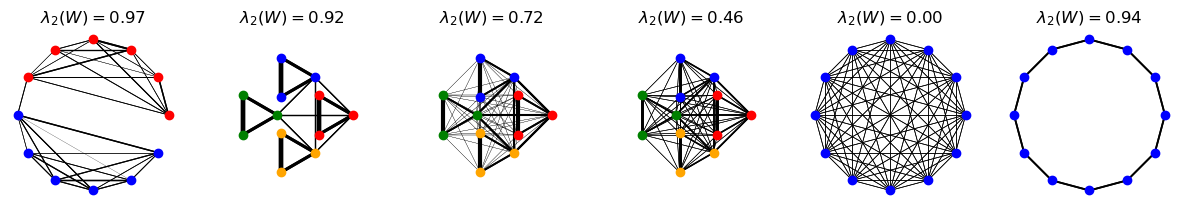

In [4]:
# Plot W side by side
fig, axs = plt.subplots(1, len(list_W), figsize=(15, 5))
for i, W in enumerate(list_W):
    eigenvalue = np.sort(abs(np.linalg.eigvals(W)))[-2]
    plot_W(W, ax=axs[i], structure = "Four" if 1 <= i <= 3 else ("RandomTight" if i == 0 else None), title = r"$\lambda_2(W) = %.2f$" % eigenvalue)
    # axs[i].set_title(f'W {i+1}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])